<a href="https://colab.research.google.com/github/Speedbird45Bravo/Keras_projects_21/blob/main/keras_SPI_32721.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# This NN is predicting SPI margin in FiveThirtyEight's Soccer Power Index (SPI).
url = "https://projects.fivethirtyeight.com/soccer-api/club/spi_matches.csv"
df = pd.read_csv(url, parse_dates=['date']).dropna()
df['spi_margin'] = abs(df['spi1'] - df['spi2'])

# Given the power of the NN in reducing loss (and the relatively small size of the project), we don't quite NEED to scale features, but we will anyway.
X_final = df[['spi1', 'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2', 'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2']].reset_index(drop=True)
y_final = df[['spi_margin']].copy()
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=6)
ss = StandardScaler().fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [157]:
# Given we are predicting scalar values, a one-unit output layer should suffice.
model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(X_train_scaled, y_train, epochs=120, batch_size=128, verbose=0)
loss, mae = model.evaluate(X_test_scaled, y_test)

156/156 [==============================] - 0s 1ms/step - loss: 0.0269 - mae: 0.1058


In [158]:
# Not bad, considering the first couple of training errors were way off, as can be seen in the graph below.
print("Mean Average Error: %.4f" % mae)

Mean Average Error: 0.1058


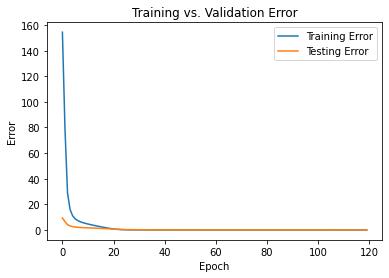

In [159]:
plt.title("Training vs. Validation Error")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.plot(history.history['loss'], label='Training Error')
plt.plot(history.history['mae'], label='Testing Error')
plt.legend()
plt.show()